# Sensitivity 

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1; compare trajectories manually

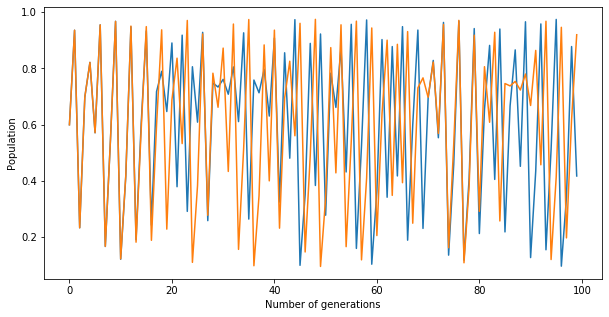

In [32]:
fig = plt.figure(figsize = (10,5))
starting_points = [0.600,0.60001] #As these numbers change, the beginning of the graph stays closer to the same for the beginning
nsteps = 100 
x = np.zeros(nsteps) 
r=3.9

for j in starting_points:
    x[0] = j 
    for i in range (1,nsteps):
        x[i] = r*x[i-1] * (1-x[i-1])  

    plt.plot(x); 
    plt.xlabel('Number of generations');
    plt.ylabel('Population');
    
#Eventually all order will be lost because of imperfections mulitplied by chaotic behavior (in every step, points that are close together are drawn apart)

# Exercise 2; Prediction Horizon

Role-playing: Let's say we actually use this equation to predict something 

Question: How far into the future can we reasonably predict?

Answer:
* If the question is about time, the answer will include a plot that has time as its horizontal axis. 
* If we have a plot with time as an axis and the question is about prediction quality, then probably the vertical axis should show some kind of prediction quality. 
* How to measure prediction quality? 
    * Option 1: Use pairs of trajectories, calculate mean absolute difference for each point in time. 
    * Option 2: Use a family of trajectories, noisify (wiggle, shake) the starting point, check how much variance it creates at each consecutive points. 

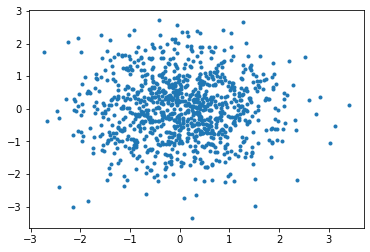

In [55]:
#A check that normal numbers generated by numpy actually look kinda normal 

plt.plot(np.random.randn(1000),np.random.randn(1000),'.');

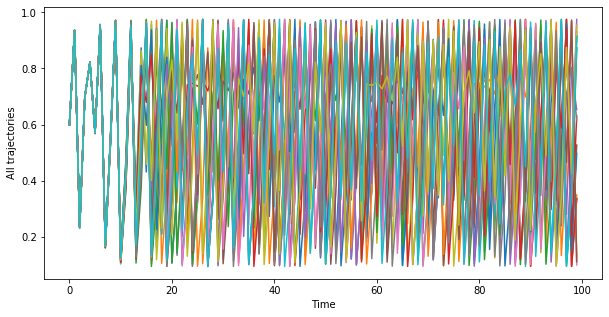

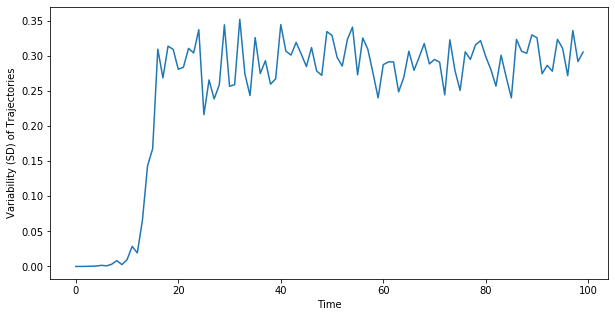

In [64]:
nsteps = 100 #Number of steps in our stimulation
ntraces = 20
x = np.zeros(shape=(nsteps,ntraces)) #Placeholder for trajectories we will generate
wiggle = 0.0001 #The standard deviation of the original noise in x[0]

r=3.9
for itrace in range(ntraces):
    x[0,itrace] = 0.6+np.random.randn(1) *wiggle
  
    for istep in range (1,nsteps):
        x[istep,itrace]= r*x[istep-1,itrace] * (1-x[istep-1,itrace])  

fig = plt.figure(figsize=(10,5))
plt.plot(x); 
plt.xlabel('Time');
plt.ylabel('All trajectories'); 

fig = plt.figure(figsize=(10,5)) 
plt.plot(np.std(x,axis=1)); #Standard Deviation calculation
plt.xlabel('Time');
plt.ylabel('Variability (SD) of Trajectories');


(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
        65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
        78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
        91., 92., 93., 94., 95., 96., 97., 98., 99.]),
 array([1.00000000e-04, 1.94002335e-04, 3.62478878e-04, 6.65644214e-04,
        1.13199102e-03, 1.99068835e-03, 3.35770282e-03, 5.79122521e-03,
        9.93556814e-03, 1.68283103e-02, 2.84706005e-02, 4.73543316e-02,
        7.73905193e-02, 1.23168691e-01, 1.84162984e-01, 2.49943309e-01,
        2.93627162e-01, 3.24008187e-01, 3.28128727e-01, 3.28468809e-01,
        3.28424000e-01, 3.31384929e-01, 3.38366489e-01, 3.42587490e-01,
  

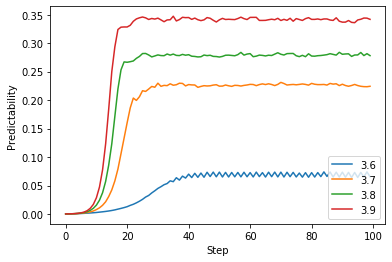

In [114]:
#Approach with pairs of trajectories

nsteps = 100 #Number of steps in our stimulation
ntrials = 10000
wiggle = 0.0001 #The difference between starting points in a pair

x = np.zeros(shape=(nsteps,2)) #For those 2 traces in a pair
diff = np.zeros(shape=(nsteps,ntrials)) #Absolute differences between trajectories for each pair

for r in np.arange(3.6,4.0,0.1):
    for itrial in range(ntrials):
        starting_point = np.random.uniform(low=0, high=1-wiggle) + np.array([0,wiggle])
        for ipair in range (2):
            x[0,ipair] = starting_point[ipair]
            for istep in range (1,nsteps):
                x[istep,ipair]= r*x[istep-1,ipair] * (1-x[istep-1,ipair])  
        diff[:,itrial] = np.abs(x[:,1]-x[:,0])
    
    curves = plt.plot(np.mean(diff,axis=1), label=np.round(r,decimals = 2));
    
plt.legend(loc='lower right'); 
plt.xlabel('Step');
plt.ylabel('Predictability');

curves[0].get_data()